# Decision Trees and Random Forests

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Classification
Generate some data points from 4 classes

In [3]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='rainbow');

In [4]:
X.shape

(300, 2)

In [5]:
Y.shape

(300,)

### Creat a decision tree
First, define a function to visualize tree classifier

In [8]:
def visualize_classifier(model, X, Y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=30, cmap=cmap,
               clim=(Y.min(), Y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the classifier
    model.fit(X, Y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(Y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    return ax

Now we can build classification trees with different depth

Text(0.5, 1.0, 'tree max_depth=1')

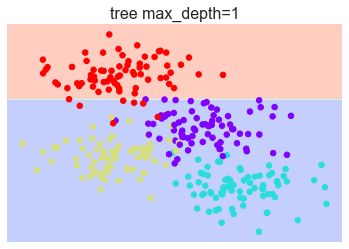

In [4]:
from sklearn.tree import DecisionTreeClassifier
max_depth=1
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
tree.fit(X, Y)
ax=visualize_classifier(tree, X, Y)
ax.set_title('tree max_depth='+str(max_depth), fontsize=16)

Text(0.5, 1.0, 'tree max_depth=3')

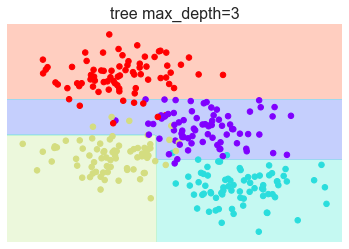

In [5]:
max_depth=3
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
tree.fit(X, Y)
ax=visualize_classifier(tree, X, Y)
ax.set_title('tree max_depth='+str(max_depth), fontsize=16)

a very deep tree may overfit the data

Text(0.5, 1.0, 'tree max_depth=10')

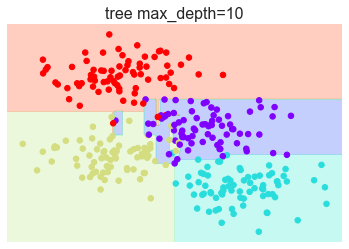

In [6]:
max_depth=10
tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
tree.fit(X, Y)
ax=visualize_classifier(tree, X, Y)
ax.set_title('tree max_depth='+str(max_depth), fontsize=16)

### Random Forest

we can manually create a Random Forest classifier by combining many trees

Text(0.5, 1.0, 'bag of trees max_depth=3')

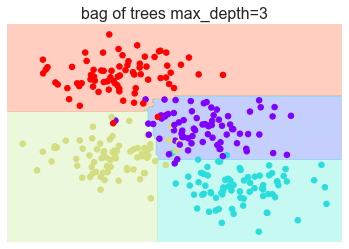

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

max_depth=3
tree = DecisionTreeClassifier(max_depth=max_depth)
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=0)
bag.fit(X, Y)
ax=visualize_classifier(bag, X, Y)
ax.set_title('bag of trees max_depth='+str(max_depth), fontsize=16)

We can simply use the RandomForestClassifier in Scikit-Learn

Text(0.5, 1.0, 'forest max_depth=3')

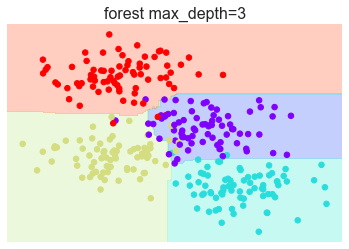

In [8]:
from sklearn.ensemble import RandomForestClassifier
max_depth=3
RF = RandomForestClassifier(n_estimators=100, max_samples=0.8, max_depth=max_depth, random_state=0)
RF.fit(X, Y)
ax=visualize_classifier(RF, X, Y);
ax.set_title('forest max_depth='+str(max_depth), fontsize=16)

We see that by averaging over 100 randomly perturbed models, we end up with an overall model that is much closer to our intuition about how the parameter space should be split.

## Regression

We generate some data points from the combination of a fast and slow oscillation:

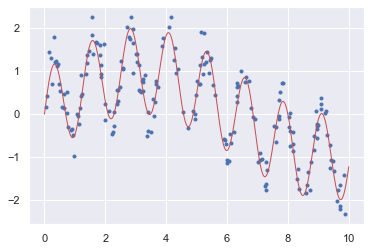

In [9]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.plot(x, y, 'b.')

xfit = np.linspace(0, 10, 1000)
ytrue = model(xfit, sigma=0)
plt.plot(xfit, ytrue, '-r', linewidth=1);

### decision tree for regression

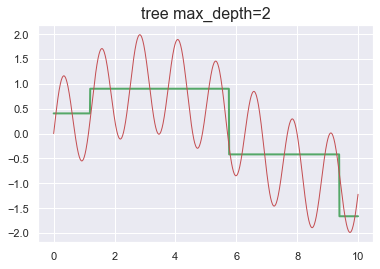

In [10]:
from sklearn.tree import DecisionTreeRegressor
max_depth=2
tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
tree.fit(x.reshape(-1,1), y)
yfit = tree.predict(xfit.reshape(-1,1))
plt.title('tree max_depth='+str(max_depth), fontsize=16)
plt.plot(xfit, yfit, '-g', linewidth=2);
plt.plot(xfit, ytrue, '-r', linewidth=1);

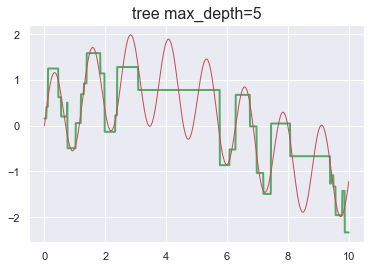

In [11]:
max_depth=5
tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
tree.fit(x.reshape(-1,1), y)
yfit = tree.predict(xfit.reshape(-1,1))
plt.title('tree max_depth='+str(max_depth), fontsize=16)
plt.plot(xfit, yfit, '-g', linewidth=2);
plt.plot(xfit, ytrue, '-r', linewidth=1);

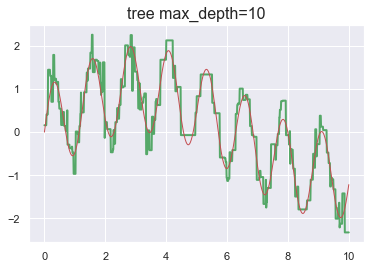

In [12]:
max_depth=10
tree = DecisionTreeRegressor(max_depth=max_depth, random_state=0)
tree.fit(x.reshape(-1,1), y)
yfit = tree.predict(xfit.reshape(-1,1))
plt.title('tree max_depth='+str(max_depth), fontsize=16)
plt.plot(xfit, yfit, '-g', linewidth=2);
plt.plot(xfit, ytrue, '-r', linewidth=1);

### random forest for regression

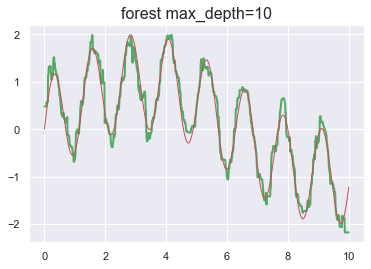

In [13]:
from sklearn.ensemble import RandomForestRegressor
max_depth=10
forest = RandomForestRegressor(100, max_samples=0.8, max_depth=max_depth, random_state=0)
forest.fit(x.reshape(-1,1), y)
yfit = forest.predict(xfit.reshape(-1,1))
plt.title('forest max_depth='+str(max_depth), fontsize=16)
plt.plot(xfit, yfit, '-g', linewidth=2);
plt.plot(xfit, ytrue, '-r', linewidth=1);